# Introduction

In this project, we will investigate if there is a strong correlation between the GDP and the life expectancy of its citizens

Here are a few questions that this project will seek to answer:

- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?

**Data Sources:**
- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.
- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Import Python Modules

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Loading data

Here **all_data.csv** will be read in into a DataFrame called `df`. We will have a quick inspectation of the DataFrame using `.head()` to check its content

In [37]:
df = pd.read_csv("all_data.csv")
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


Another check of the shape of `df` is performed

In [38]:
df.shape

(96, 4)

There are 96 rows and 4 columns in our dataset

## Explore the data

Firstly, we need to explore about the data that are represented in `df`.

In [39]:
print(df['Country'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


It seems that there are 6 countries in our dataset: 'Chile', 'China', 'Germany', 'Mexico', 'United States of America' and 'Zimbabwe'

In [40]:
print(df['Year'].unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Data in the column `Year` are 2000-2015

In [41]:
print(df.columns)

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')


In [42]:
# Renaming the 'Life expectancy at birth (years)' column to 'Life Expectancy' for easier reference
df.rename(columns = {"Life expectancy at birth (years)":"Life Expectancy"}, inplace = True)
print(df.head())

  Country  Year  Life Expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life Expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [44]:
df.describe(include = 'all')

,Country,Year,Life Expectancy,GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


## Exploratory Plots

### Has life expectancy increased over time in the six nations?

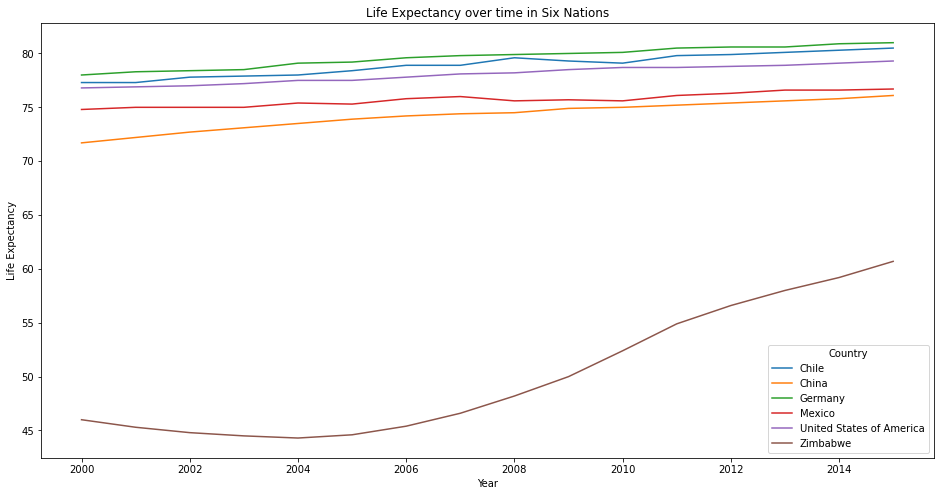

<Figure size 432x288 with 0 Axes>

In [46]:
plt.figure(figsize = (16, 8))
sns.lineplot(x = "Year", y = "Life Expectancy", data = df, hue = "Country")
plt.title("Life Expectancy over time in Six Nations")
plt.show()
plt.clf()

Life Expectacy has generally increased mostly over year. Zimbabwe's Life Expectancy is quite low when we compares to other contries. This country started to arise after 2004 and they increase well in Life Expectacy from 45 years old to 60 years old.

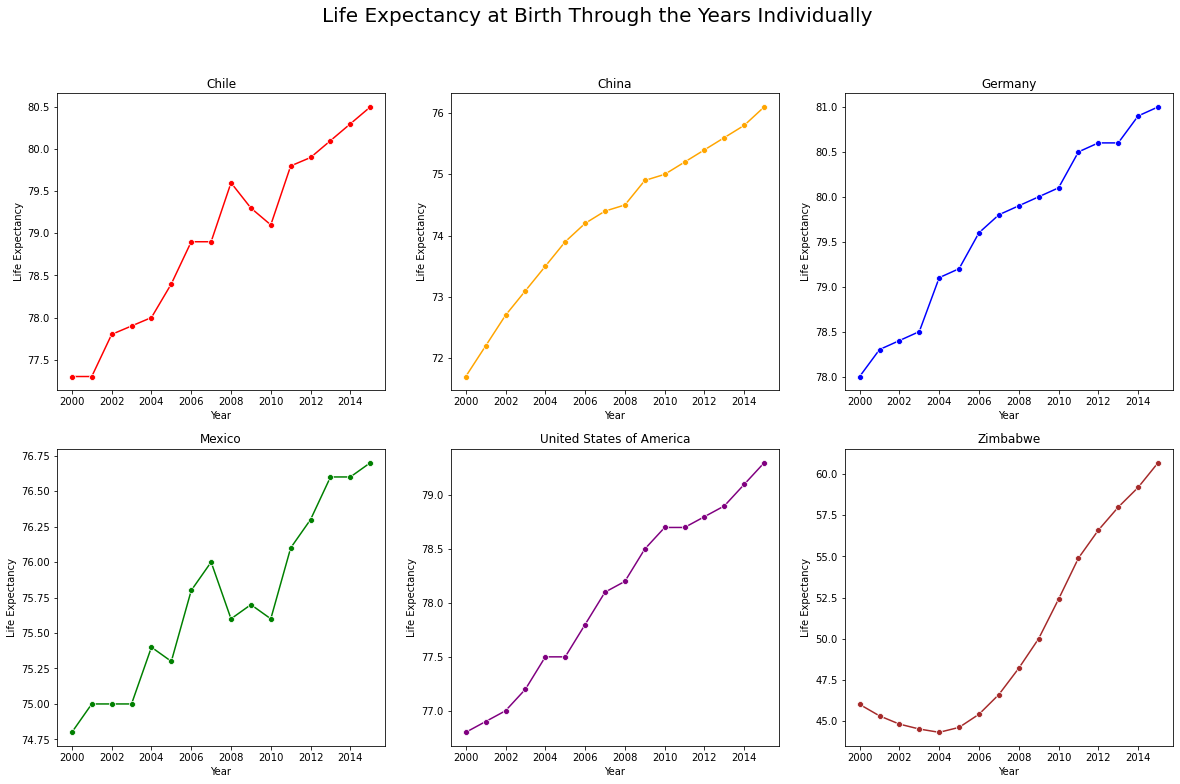

In [89]:
# Life Expectancy Through the Years Invidually
fig, ax = plt.subplots(2, 3, figsize = (20, 12))
country_names = df.Country.unique()
number = list(range(len(country_names)))
colors = ["red", "orange", "blue", "green", "purple", "brown"]
for num, country, color in zip(number, country_names, colors):
    ax1 = plt.subplot(2, 3, num + 1)
    sns.lineplot(x = "Year", y = "Life Expectancy", data = df[df["Country"] == country], marker = "o", color = color)
    ax1.set_title(country)
    ax1.set_xticks(list(range(2000, 2016, 2)))
    ax1.set_xticklabels(list(range(2000, 2016, 2)))
plt.suptitle("Life Expectancy at Birth Through the Years Individually", fontsize = 20)
plt.show()

### Has GDP increased over time in the six nations?

In [92]:
df['trilion_USD_GDP'] = df['GDP']/1e12
print(df.head())

  Country  Year  Life Expectancy           GDP  trilion_USD_GDP
0   Chile  2000             77.3  7.786093e+10         0.077861
1   Chile  2001             77.3  7.097992e+10         0.070980
2   Chile  2002             77.8  6.973681e+10         0.069737
3   Chile  2003             77.9  7.564346e+10         0.075643
4   Chile  2004             78.0  9.921039e+10         0.099210


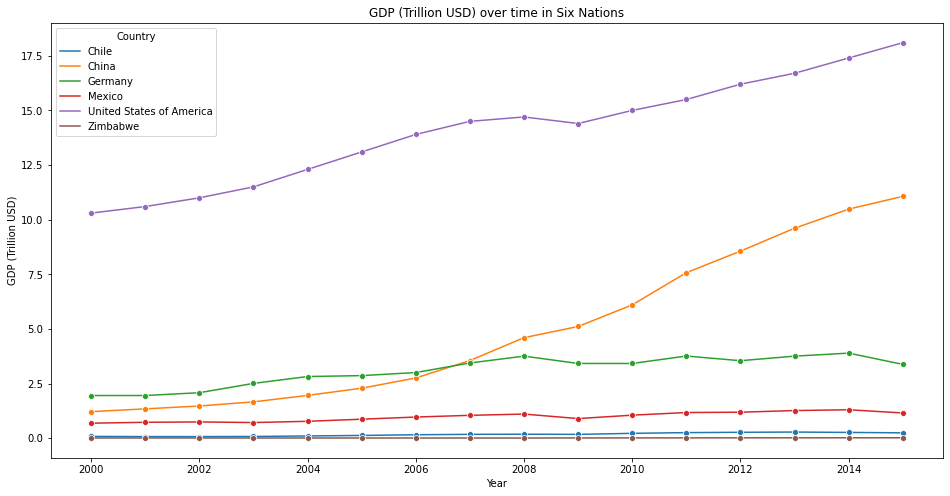

<Figure size 432x288 with 0 Axes>

In [95]:
plt.figure(figsize = (16, 8))
sns.lineplot(x = "Year", y = "trilion_USD_GDP", data = df, hue = "Country", marker = 'o')
plt.ylabel("GDP (Trillion USD)")
plt.title("GDP (Trillion USD) over time in Six Nations")
plt.show()
plt.clf()

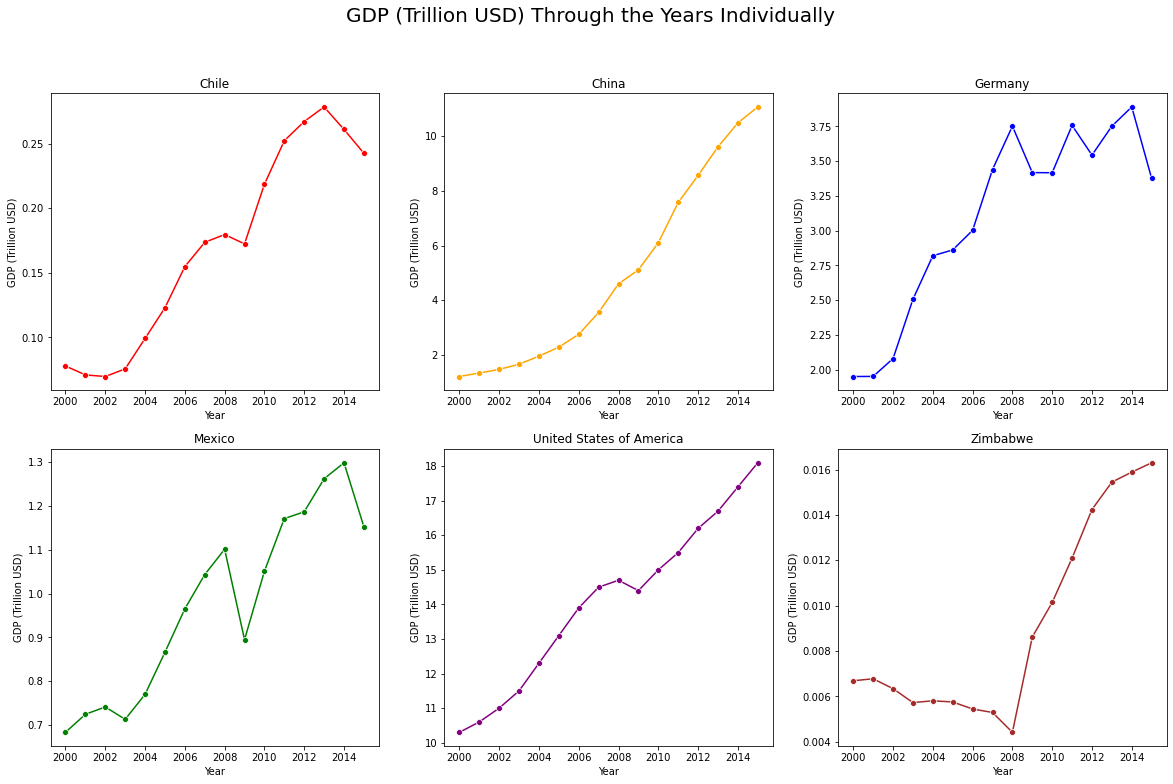

In [97]:
# Life Expectancy Through the Years Invidually
fig, ax = plt.subplots(2, 3, figsize = (20, 12))
country_names = df.Country.unique()
number = list(range(len(country_names)))
colors = ["red", "orange", "blue", "green", "purple", "brown"]
for num, country, color in zip(number, country_names, colors):
    ax1 = plt.subplot(2, 3, num + 1)
    sns.lineplot(x = "Year", y = "trilion_USD_GDP", data = df[df["Country"] == country], marker = "o", color = color)
    ax1.set_title(country)
    ax1.set_xticks(list(range(2000, 2016, 2)))
    ax1.set_xticklabels(list(range(2000, 2016, 2)))
    plt.ylabel("GDP (Trillion USD)")
plt.suptitle("GDP (Trillion USD) Through the Years Individually", fontsize = 20)
plt.show()

GDP is growing steadily in the US and China. In Germany, GDP stopped growing in 2008 and held on to 2015 with slight fluctuations and began to fail. In the rest of the countries, GDP is at a low level and practically unchanged during the years of observations.

### Is there a correlation between GDP and life expectancy of a country?

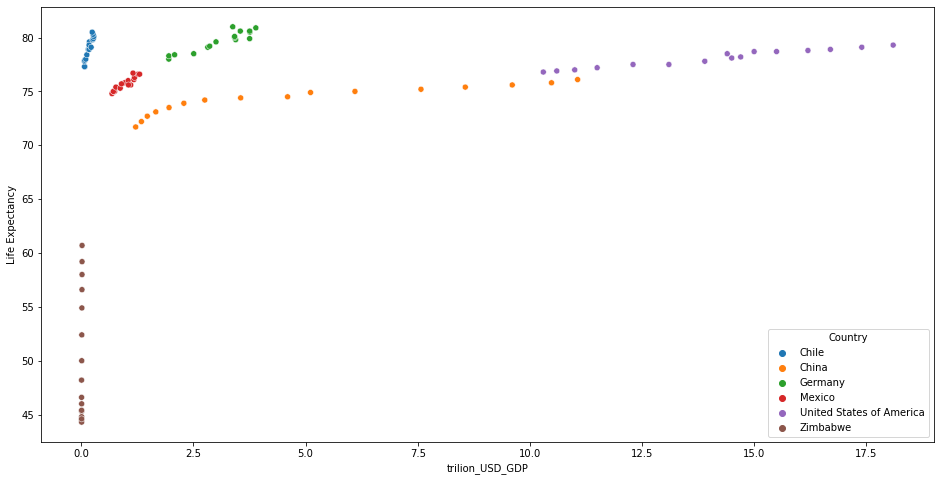

<Figure size 432x288 with 0 Axes>

In [100]:
plt.figure(figsize = (16, 8))
sns.scatterplot(x = 'trilion_USD_GDP', y = "Life Expectancy", hue = 'Country', data = df)
plt.show()
plt.clf()

In [101]:
# Calculating the correlation between GDP and Life Expectancy
correlation = df['GDP'].corr(df['Life Expectancy'])
print(correlation)

0.3432067484491559


There is some relationship between a country's GDP and life expectancy: countries with higher GDP tend to have higher life expectancy. However, this relationship is not strong and there are many other factors that can influence life expectancy.

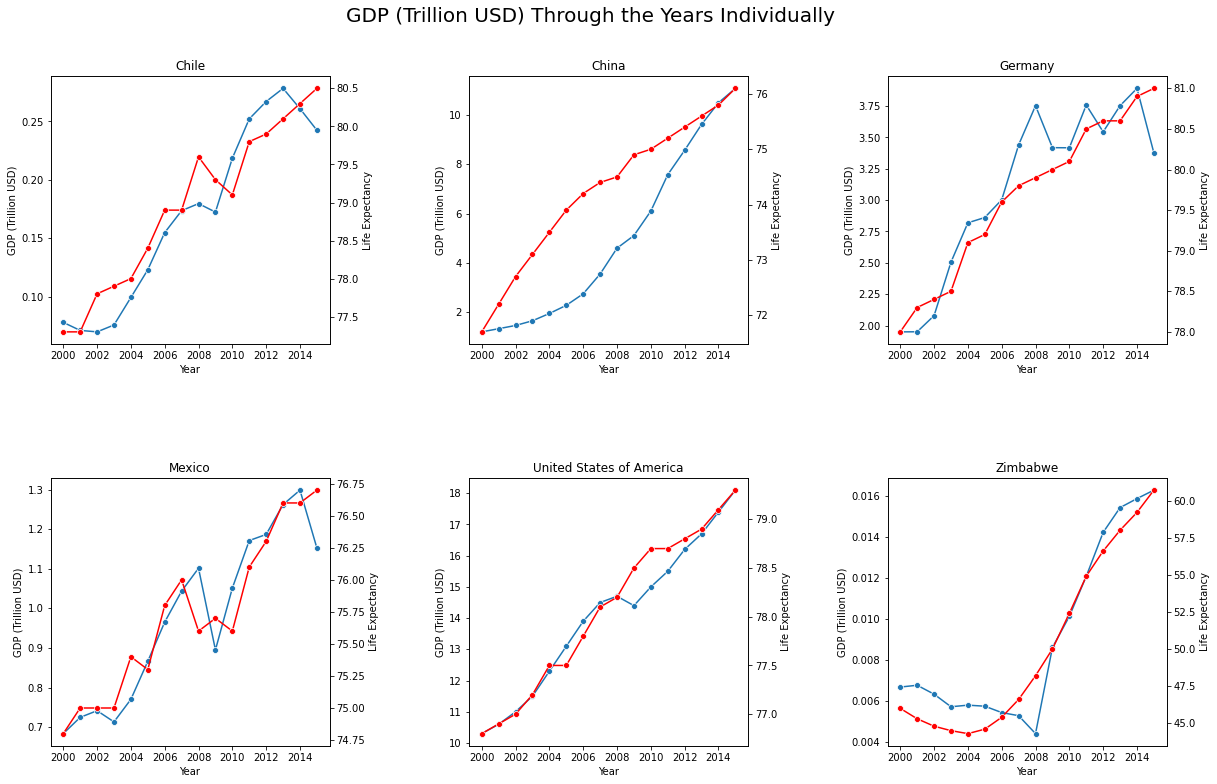

In [107]:
# Life Expectancy Through the Years Invidually
fig, ax = plt.subplots(2, 3, figsize = (20, 12))
country_names = df.Country.unique()
number = list(range(len(country_names)))
colors = ["red", "orange", "blue", "green", "purple", "brown"]
for num, country, color in zip(number, country_names, colors):
    ax1 = plt.subplot(2, 3, num + 1)
    sns.lineplot(x = "Year", y = "trilion_USD_GDP", data = df[df["Country"] == country], marker = "o")
    ax1.set_title(country)
    ax1.set_xticks(list(range(2000, 2016, 2)))
    ax1.set_xticklabels(list(range(2000, 2016, 2)))
    ax1.set_ylabel("GDP (Trillion USD)")
    ax2 = ax1.twinx()
    sns.lineplot(x = "Year", y = "Life Expectancy", data = df[df["Country"] == country], marker = "o", ax = ax2, color = 'red')
    ax2.set_ylabel("Life Expectancy")
plt.suptitle("GDP (Trillion USD) Through the Years Individually", fontsize = 20)
plt.subplots_adjust(top=0.9, hspace=0.5, wspace=0.5)
plt.show()

### How do the Life Expectancy and GDP vary among different countries?

In [150]:
leaby_gdp_means = df.groupby("Country").mean()
leaby_gdp_means = leaby_gdp_means.reset_index()
print(leaby_gdp_means)

    Country    Year  Life Expectancy           GDP  trilion_USD_GDP
0     Chile  2007.5         78.94375  1.697888e+11         0.169789
1     China  2007.5         74.26250  4.957714e+12         4.957714
2   Germany  2007.5         79.65625  3.094776e+12         3.094776
3    Mexico  2007.5         75.71875  9.766506e+11         0.976651
4       USA  2007.5         78.06250  1.407500e+13        14.075000
5  Zimbabwe  2007.5         50.09375  9.062580e+09         0.009063


In [149]:
df['Country'] = df['Country'].replace('United States of America', 'USA')

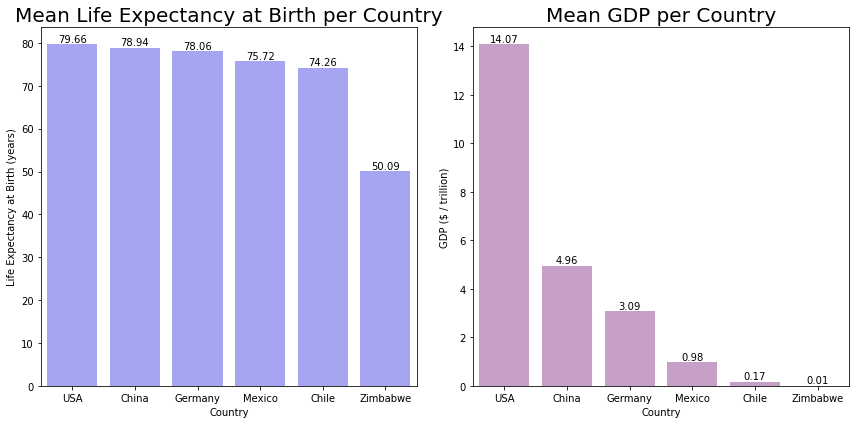

In [158]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6), sharex = True)

leaby_gdp_means_sorted = leaby_gdp_means.sort_values(by=["Life Expectancy"], ascending=[False])

sns.barplot(x = "Country", y = "Life Expectancy", data = leaby_gdp_means_sorted, ax = ax[0], color = "blue", alpha = 0.4)
ax[0].set_title("Mean Life Expectancy at Birth per Country", fontsize=20)
ax[0].set_xlabel("Country")
ax[0].set_ylabel("Life Expectancy at Birth (years)")
for index, leaby in enumerate(leaby_gdp_means_sorted["Life Expectancy"]):
    ax[0].text(index, leaby, f"{leaby:.2f}", ha="center", va="bottom")

leaby_gdp_means_sorted = leaby_gdp_means.sort_values(by=["trilion_USD_GDP"], ascending=[False])

sns.barplot(x = "Country", y = "trilion_USD_GDP", data = leaby_gdp_means_sorted, ax = ax[1], color = "purple", alpha = 0.4)
ax[1].set_title("Mean GDP per Country", fontsize=20)
ax[1].set_xlabel("Country")
ax[1].set_ylabel("GDP ($ / trillion)")
for index, gdp in enumerate(leaby_gdp_means_sorted["trilion_USD_GDP"]):
    ax[1].text(index, gdp, f"{gdp:.2f}", ha="center", va="bottom")


plt.tight_layout()
plt.subplots_adjust(wspace=0.15)
plt.show()

### What is the distribution of that life expectancy?

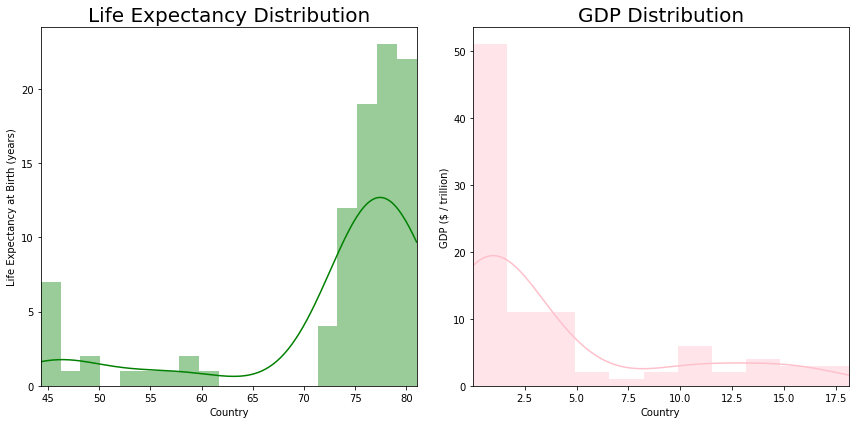

In [182]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

#plot the Life expectancy distribution on the first subplot
sns.histplot(data = df, x = "Life Expectancy", alpha = 0.4, color = "green", ax = ax[0], edgecolor = None, kde = True)
sns.despine(left=False, right=False, top=False, bottom=False, ax=ax[0])
ax[0].set_title("Life Expectancy Distribution", fontsize=20)
ax[0].set_xlabel("Country")
ax[0].set_ylabel("Life Expectancy at Birth (years)")
ax[0].set_xlim(df["Life Expectancy"].min(), df["Life Expectancy"].max())

#plot the GDP distribution on the second subplot
sns.histplot(data = df, x = "trilion_USD_GDP", alpha = 0.4, color = "pink", ax = ax[1], edgecolor = None, kde = True)

ax[1].set_title("GDP Distribution", fontsize=20)
ax[1].set_xlabel("Country")
ax[1].set_ylabel("GDP ($ / trillion)")
ax[1].set_xlim(df["trilion_USD_GDP"].min(), df["trilion_USD_GDP"].max())


plt.tight_layout()
plt.subplots_adjust(wspace=0.15)
plt.show()

- **GDP Distribution**
The distribution of GDP is right-skewed. This means that the majority of countries tend to have lower GDP values, while a few countries have significantly higher GDP values, leading to a longer right tail in the distribution.
This is indicative of income disparities, where a small number of countries or individuals possess a significant portion of the total wealth.

- **Life Expectancy Distribution**
The distribution of Life Expectancy is left-skewed. This implies that the majority of countries have relatively higher life expectancy values, while a few countries have lower life expectancy values, resulting in a longer left tail in the distribution.
This could suggest that most countries enjoy relatively good health conditions and longer life spans, while a few countries may face challenges in terms of healthcare, nutrition, or other factors affecting life expectancy.
